In [221]:
import sklearn
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import seaborn as sns
from sklearn import svm

In [222]:
data = pd.read_csv(r'SVMdataset.csv')

In [223]:
feature_cols = ['x1', 'x2']
X = data[feature_cols]
y = data.y
one = data.loc[y == 1]
zero = data.loc[y == 0]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.4,random_state=0)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, train_size=0.5, random_state=100)

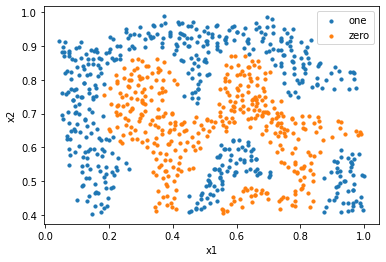

In [224]:
onex1 = one.iloc[:, 0]
onex2 = one.iloc[:, 1]
zerox1 = zero.iloc[:, 0]
zerox2 = zero.iloc[:, 1]

plt.scatter(onex1, onex2, s=10, label='one')
plt.scatter(zerox1, zerox2, s=10, label='zero')
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()
plt.show()

In [191]:
# Finding the best value for C and gamma
# substitute i for the value of C then Gamma
max = 0
i = 2
while i < 10000000:
    clf_gaussian = svm.SVC(C=2097152,kernel='rbf',gamma=i)
    clf_gaussian.fit(X_train, y_train)
    pred = clf_gaussian.predict(X_test)
    y_pred = clf_gaussian.predict(X_val)
    print(max, i)
    if max < metrics.f1_score(y_val, y_pred):
        max = metrics.f1_score(y_val, y_pred)
    i = i*2

0 2
0.9782608695652174 4


KeyboardInterrupt: 

0.6543778801843319


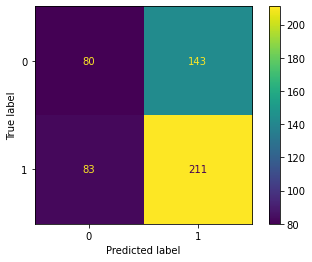

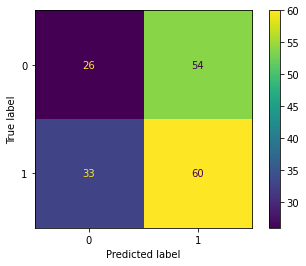

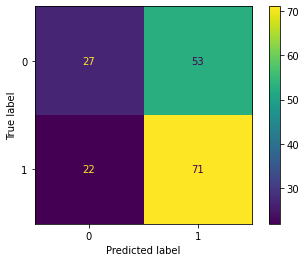

In [192]:
# The f1% and the confusion matrix for the Linear classifer
clf_Linear = svm.SVC(C=2097152,kernel='linear',gamma=64)
clf_Linear.fit(X_train, y_train)
pred = clf_Linear.predict(X_test)
y_pred = clf_Linear.predict(X_val)
print(metrics.f1_score(y_val, y_pred))
sklearn.metrics.plot_confusion_matrix(clf_Linear,X_train,y_train)
sklearn.metrics.plot_confusion_matrix(clf_Linear,X_test,y_test)
sklearn.metrics.plot_confusion_matrix(clf_Linear,X_val,y_val)

([], <a list of 0 Text major ticklabel objects>)

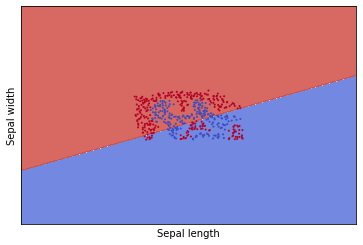

In [218]:
x_min, x_max = X_train.iloc[:, 0].min() - 1, X_train.iloc[:, 0].max() + 1
y_min, y_max = X_train.iloc[:, 1].min() - 1, X_train.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.002),
                     np.arange(y_min, y_max, 0.002))



Z = clf_Linear.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

# Plot also the training points
plt.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], c=y_train,cmap=plt.cm.coolwarm, s=1)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())


In [193]:
y_pred = clf_Linear.predict(X_val)
print("Accuracy:",metrics.accuracy_score(y_val, y_pred))
print("Precision:",metrics.precision_score(y_val, y_pred))
print("Recall:",metrics.recall_score(y_val, y_pred))
print("f1:",metrics.f1_score(y_val, y_pred))

Accuracy: 0.5664739884393064
Precision: 0.5725806451612904
Recall: 0.7634408602150538
f1: 0.6543778801843319


0.989247311827957


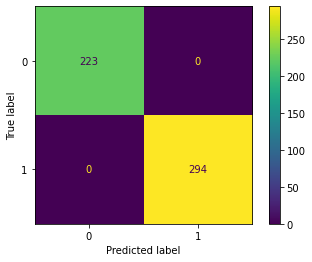

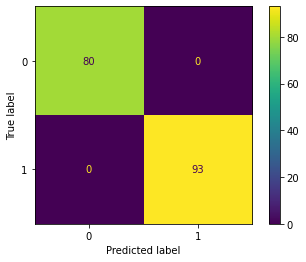

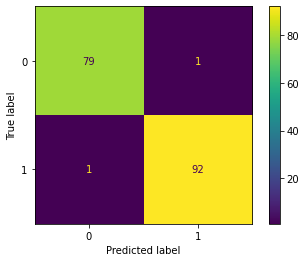

In [198]:
# The f1% and the confusion matrix for the Gaussian classifer
# C = 2097152, Gamma = 64
clf_gaussian = svm.SVC(C=2097152,kernel='rbf',gamma=64)
clf_gaussian.fit(X_train, y_train)
pred = clf_gaussian.predict(X_test)
y_pred = clf_gaussian.predict(X_val)
print(metrics.f1_score(y_val, y_pred))
sklearn.metrics.plot_confusion_matrix(clf_gaussian,X_train,y_train)
sklearn.metrics.plot_confusion_matrix(clf_gaussian,X_test,y_test)
sklearn.metrics.plot_confusion_matrix(clf_gaussian,X_val,y_val)

([], <a list of 0 Text major ticklabel objects>)

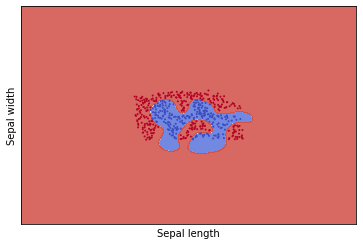

In [219]:
x_min, x_max = X_train.iloc[:, 0].min() - 1, X_train.iloc[:, 0].max() + 1
y_min, y_max = X_train.iloc[:, 1].min() - 1, X_train.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.002),
                     np.arange(y_min, y_max, 0.002))



Z = clf_gaussian.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

# Plot also the training points
plt.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], c=y_train, cmap=plt.cm.coolwarm, s=1,)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())


In [220]:
y_pred = clf_gaussian.predict(X_val)
print("Accuracy:",metrics.accuracy_score(y_val, y_pred))
print("Precision:",metrics.precision_score(y_val, y_pred))
print("Recall:",metrics.recall_score(y_val, y_pred))
print("f1:",metrics.f1_score(y_val, y_pred))

Accuracy: 0.9884393063583815
Precision: 0.989247311827957
Recall: 0.989247311827957
f1: 0.989247311827957
